# **Author: Dr. Mohammad Javad Parseh (Jahrom University)**

## Morphological Operations

An important part of image analysis involves understanding the shape of the objects in that image through ***morphological operations***. Morphology means form or structure. In morphological operations, the goal is to transform the structure or form of the objects using a structuring element. These operations change the ***shape*** and ***size*** of the objects in the image.

Morphological operations can be applied on `binary`, `grayscale`, and `color` images. We omit morphology on color images in this chapter, as most bio-medical images are grayscale or binary images. We begin with basic morphological operations such as `dilation`, `erosion`, `opening`, and `closing` and then progress to compound operations such as `hit-or-miss` and `skeletonization`.

Morphology was introduced by Jean Serra in the 1960s as a part of his Ph.D. thesis under Georges Matheron at the Ecole des Mines de Paris, France. Serra applied the techniques he developed in the field of geology. With the arrival of modern computers, morphology began to be applied on images of all types such as black and white, grayscale and color. Over the next several decades, Serra developed the formalism for applying morphology on various data types like images, videos, meshes, etc.

### Dilation

The ***dilation operation*** allows the foreground pixels in an image to grow or expand. Hence this operation will also fill small holes in an object. It is also used to combine objects that are close enough to each other but are not connected. The dilation of the image `I` with a structuring element `S` is denoted
as `I ⊕ S`:

In [ ]:
import numpy as np
from scipy import ndimage

a = np.zeros((5, 5))
a[2, 2] = 1
print(a)
print()
print(ndimage.morphology.binary_dilation(a, iterations=4).astype(a.dtype))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


<ipython-input-12-b667e1bc7acb>:8: DeprecationWarning: Please import `binary_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  print(ndimage.morphology.binary_dilation(a, iterations=4).astype(a.dtype))


In [ ]:
struct1 = ndimage.generate_binary_structure(2, 2)
print(struct1)
print()
print(ndimage.morphology.binary_dilation(a, structure=struct1).astype(a.dtype))

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]


<ipython-input-17-d22d5aa86939>:4: DeprecationWarning: Please import `binary_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  print(ndimage.morphology.binary_dilation(a, structure=struct1).astype(a.dtype))


In [ ]:
from skimage.morphology import dilation
import numpy as np

a = np.zeros((5, 4))
a[0,1] = 1
a[0,2] = 1
a[1,0] = 1
a[1,1] = 1
a[2,0] = 1
a[2,1] = 1
a[2,2] = 1
a[3,1] = 1
a[3,2] = 1
a[4,1] = 1
a[4,2] = 1
print(a)
print()
s = np.ones((1,2))
print(s)
print()
b = dilation(a,s)
print(b)

[[0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]

[[1. 1.]]

[[1. 1. 1. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]


<ipython-input-23-9b92b04d57b6>:18: DeprecationWarning: Please import `binary_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = snd.morphology.binary_dilation(a, structure=s, iterations=1)


True

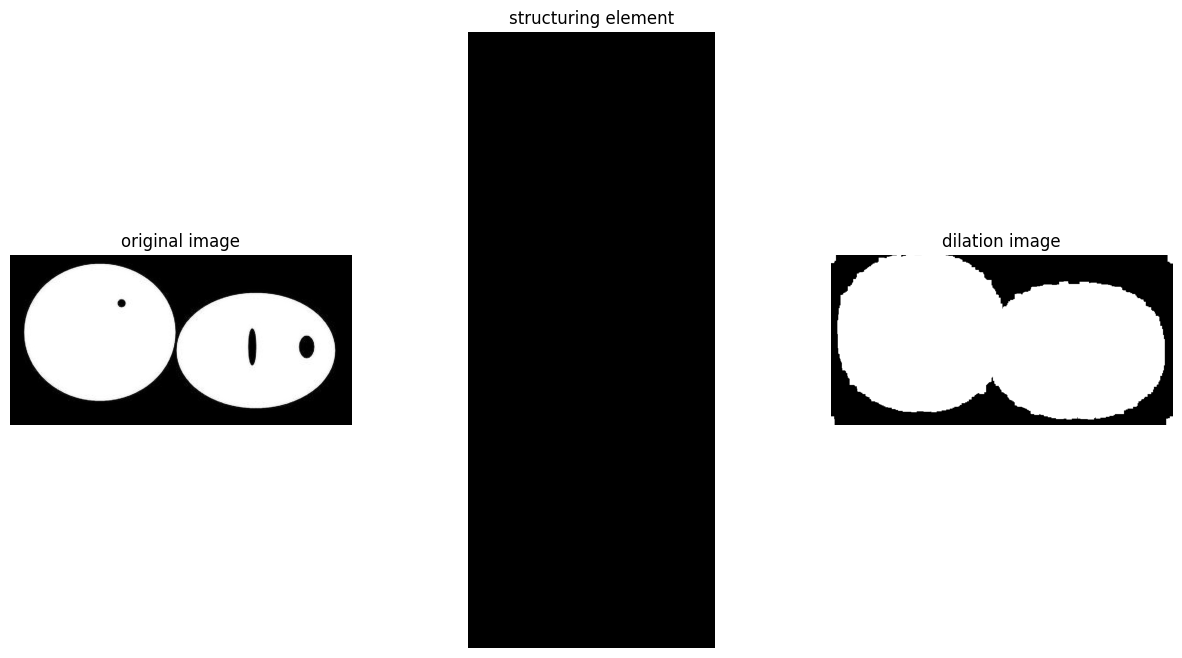

In [23]:
from PIL import Image
import scipy.ndimage as snd
import matplotlib.pyplot as plt
from skimage.morphology import (footprint_rectangle, diamond, disk, octahedron,
                                ball, octagon, star, )
import numpy as np
import cv2
import os

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/dil_image.png')).convert('L')
a = np.array(a)
s = footprint_rectangle((25,10))
#s = disk(3)
#s = diamond(3)
#Performing binary dilation for 5 iterations.
b = snd.morphology.binary_dilation(a, structure=s, iterations=1)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('structuring element')
plt.imshow(s, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('dilation image')
plt.imshow(b, cmap='gray')
plt.axis('off')


# Saving the image as 8-bit as b is a binary image of dtype=bool
cv2.imwrite('di_binary.png', b*255)

(-0.5, 753.5, 375.5, -0.5)

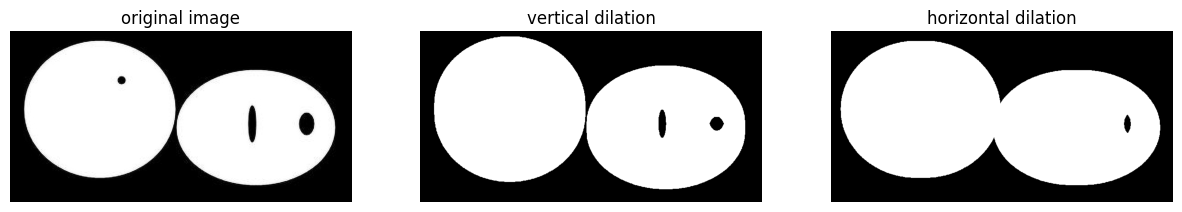

In [24]:
from PIL import Image
from skimage.morphology import dilation
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import (footprint_rectangle, diamond, disk, octahedron,
                                ball, octagon, star, )
import numpy as np
import cv2
import os

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/dil_image.png')).convert('L')
a = np.array(a)
a_binary = a > threshold_otsu(a)
#s = footprint_rectangle((2,4))
#s = disk(3)
#s = diamond(3)
sev = np.ones((20,1))
seh = np.ones((1,20))
b_v = dilation(a_binary, sev)
b_h = dilation(a_binary, seh)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('vertical dilation')
plt.imshow(b_v, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('horizontal dilation')
plt.imshow(b_h, cmap='gray')
plt.axis('off')

### Erosion

***Erosion*** is used to shrink objects in an image by removing pixels from the boundary of that object. Erosion is opposite of dilation. The erosion of the image `I` and with a structuring element `S` is denoted as `I ⊖ S`.

<ipython-input-29-52246eae8a68>:13: DeprecationWarning: Please import `binary_erosion` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = snd.morphology.binary_erosion(a, structure=s,iterations=10)


True

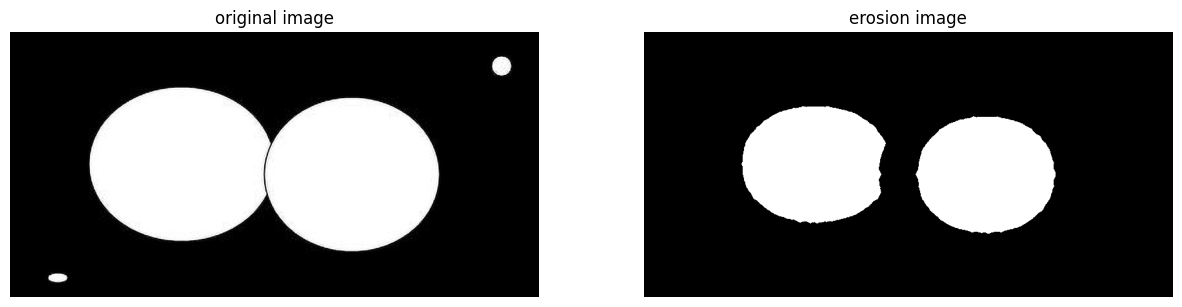

In [29]:
from PIL import Image
import scipy.ndimage as snd
import numpy as np
import cv2
from skimage.morphology import disk

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/er_image.png')).convert('L')
a = np.array(a)
s = disk(3)
# Performing binary erosion for 20 iterations.
b = snd.morphology.binary_erosion(a, structure=s,iterations=10)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('erosion image')
plt.imshow(b, cmap='gray')
plt.axis('off')

# Saving the image as 8-bit as b is a binary image of dtype=bool
cv2.imwrite('er_binary_output_20.png', b*255)

(-0.5, 819.5, 411.5, -0.5)

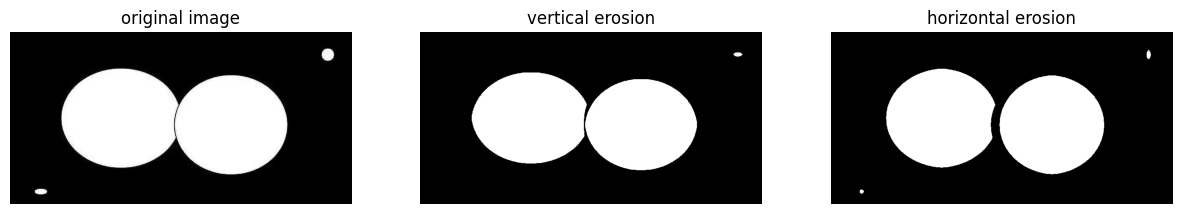

In [28]:
from PIL import Image
from skimage.morphology import erosion
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import (footprint_rectangle, diamond, disk, octahedron,
                                ball, octagon, star, )
import numpy as np
import cv2
import os

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/er_image.png')).convert('L')
a = np.array(a)
a_binary = a > threshold_otsu(a)
#s = footprint_rectangle((2,4))
#s = disk(3)
#s = diamond(3)
sev = np.ones((20,1))
seh = np.ones((1,20))
b_v = erosion(a_binary, sev)
b_h = erosion(a_binary, seh)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('vertical erosion')
plt.imshow(b_v, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('horizontal erosion')
plt.imshow(b_h, cmap='gray')
plt.axis('off')

### Grayscale Dilation and Erosion

<ipython-input-30-7c98797d11b9>:12: DeprecationWarning: Please import `grey_erosion` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b1 = scipy.ndimage.morphology.grey_erosion(a, footprint=s)
<ipython-input-30-7c98797d11b9>:13: DeprecationWarning: Please import `grey_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b2 = scipy.ndimage.morphology.grey_dilation(a, footprint=s)


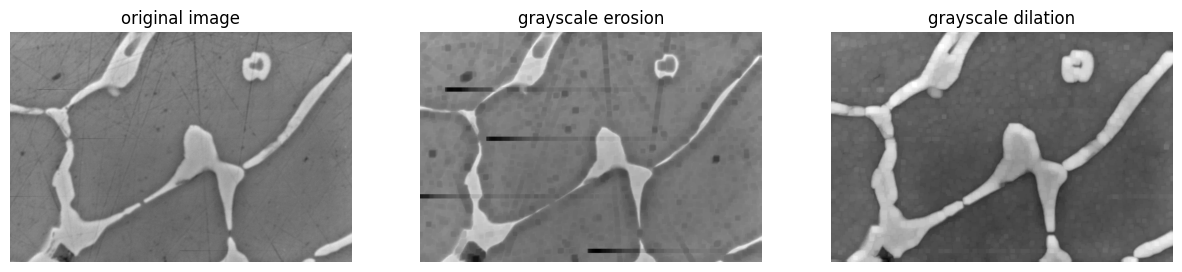

In [30]:
import numpy as np
from PIL import Image
import scipy.ndimage
# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/sem3.png')).convert('L')
a = np.array(a)

# Creating a structuring element.
s = np.ones((25, 25))
# Performing grey erosion.
b1 = scipy.ndimage.morphology.grey_erosion(a, footprint=s)
b2 = scipy.ndimage.morphology.grey_dilation(a, footprint=s)
# Converting ndarray to image.
c1 = Image.fromarray(b1)
c2 = Image.fromarray(b2)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('grayscale erosion')
plt.imshow(c1, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('grayscale dilation')
plt.imshow(c2, cmap='gray')
plt.axis('off')

# Saving the image.
c1.save('grey_erosion_output_15.png')
c2.save('grey_dilation_output_15.png')

### Opening

***Opening*** is defined as erosion followed by dilation of an image. The opening of the image `I` with a structuring element `S` is denoted as:

`I ◦ S = (I ⊖ S) ⊕ S`

<ipython-input-33-498a0434b1bf>:16: DeprecationWarning: Please import `binary_opening` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = snd.morphology.binary_opening(a, structure=s, iterations=5)


True

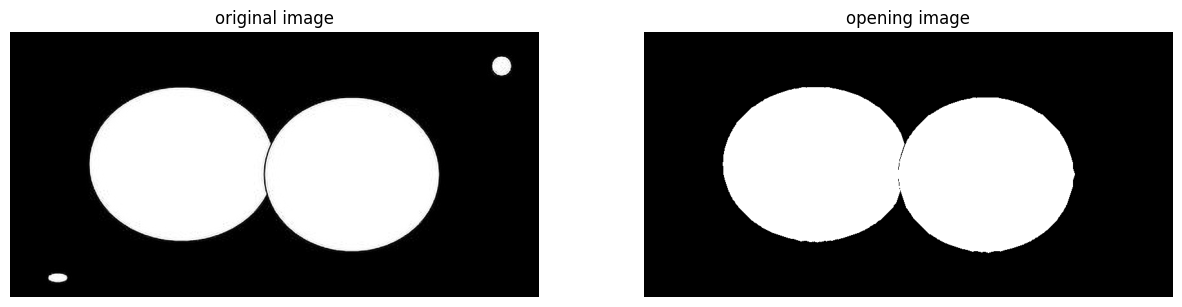

In [33]:
from PIL import Image
import scipy.ndimage as snd
import numpy as np
import cv2
from skimage.morphology import disk

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/er_image.png')).convert('L')
a = np.array(a)

# Defining the structuring element.
#s = [[0,1,0],[1,1,1], [0,1,0]]
s = disk(7)
# Performing the binary opening for 5 iterations.
b = snd.morphology.binary_opening(a, structure=s, iterations=5)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('opening image')
plt.imshow(b, cmap='gray')
plt.axis('off')

# Saving the image as 8-bit as b is a binary image of dtype=bool
cv2.imwrite('opening_binary.png', b*255)

### Closing

***Closing*** is defined as dilation followed by erosion of an image. The closing of the image `I` with a structuring element `S` is denoted as:

`I • S = (I ⊕ S) ⊖ S`

<ipython-input-36-316c108085d2>:16: DeprecationWarning: Please import `binary_closing` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = snd.morphology.binary_closing(a, structure=s, iterations=5)


True

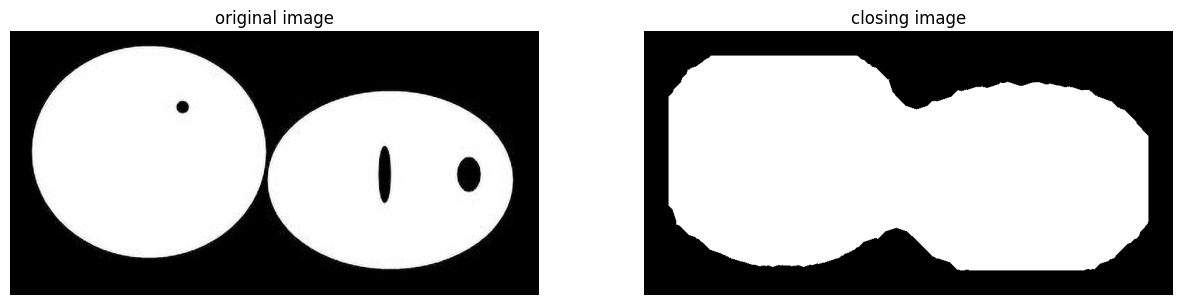

In [36]:
from PIL import Image
import scipy.ndimage as snd
import numpy as np
import cv2
from skimage.morphology import disk

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/dil_image.png')).convert('L')
a = np.array(a)

# Defining the structuring element.
#s = [[0,1,0],[1,1,1], [0,1,0]]
s = disk(7)
# Performing the binary opening for 5 iterations.
b = snd.morphology.binary_closing(a, structure=s, iterations=5)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('closing image')
plt.imshow(b, cmap='gray')
plt.axis('off')

# Saving the image as 8-bit as b is a binary image of dtype=bool
cv2.imwrite('closing_binary.png', b*255)

### Grayscale Opening

Erosion followed by dilation results in ***opening***.

<ipython-input-42-5bd7d5f03262>:13: DeprecationWarning: Please import `grey_opening` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = scipy.ndimage.morphology.grey_opening(a, footprint=s)


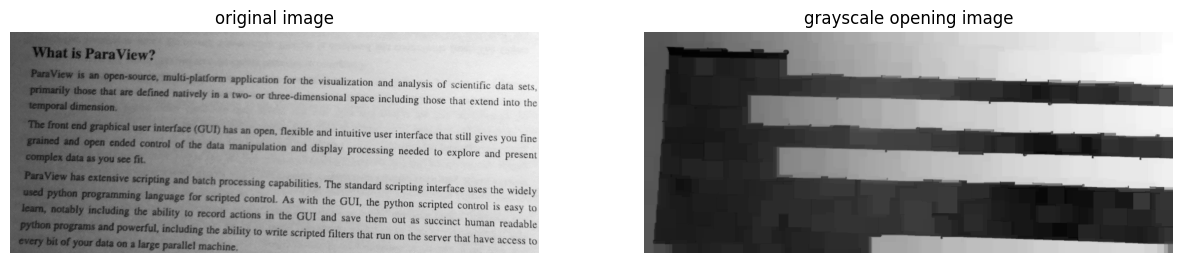

In [42]:
import numpy as np
from PIL import Image
import scipy.ndimage

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/adaptive_example1.png')).convert('L')
a = np.asarray(a)
#a = 255 - a
# Creating a structuring element.
s = np.ones((40,40))
# Performing grey opening.
b = scipy.ndimage.morphology.grey_opening(a, footprint=s)
# Converting ndarray to image.
c = Image.fromarray(b)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('grayscale opening image')
plt.imshow(c, cmap='gray')
plt.axis('off')

# Saving the image.
c.save('grey_opening_output_40.png')

### Grayscale Closing

Dilation followed by erosion results in ***closing***.

<ipython-input-45-6f46b3ec6484>:12: DeprecationWarning: Please import `grey_closing` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  bg = scipy.ndimage.morphology.grey_closing(a, footprint=s)


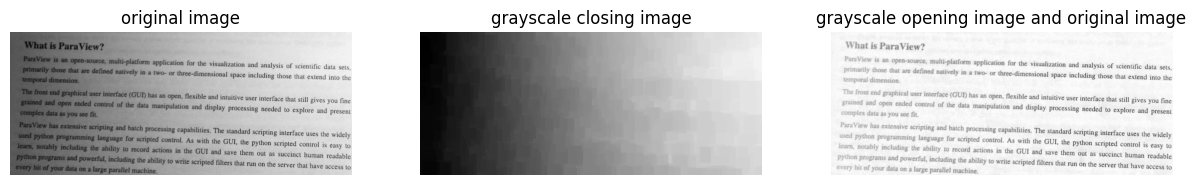

In [45]:
import numpy as np
from PIL import Image
import scipy.ndimage
# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/adaptive_example1.png')).convert('L')
a = np.asarray(a)
#a = 255 - a
# Creating a structuring element.
s = np.ones((40,40))
# Performing grey closing.
bg = scipy.ndimage.morphology.grey_closing(a, footprint=s)
# bg represents the background.
# We will subtract bg from a to remove the background in a.
bg_free = (a.astype(np.float64) - bg.astype(np.float64))
# We rescale bg_free to 0 to 255.
denom = (bg_free.max()-bg_free.min())
bg_free_norm = (bg_free - bg_free.min())*255/denom
# Converting bg_free_norm to uint8.
bg_free_norm = bg_free_norm.astype(np.uint8)
# Converting bg_free_norm and bg to images.
bg_free_norm = Image.fromarray(bg_free_norm)
bg = Image.fromarray(bg)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('grayscale closing image')
plt.imshow(bg, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('grayscale opening image and original image')
plt.imshow(bg_free_norm, cmap='gray')
plt.axis('off')
plt.show()
# Saving the background image.
bg.save('grey_closing_out_40.png')
# Saving the bg_free_norm image.
bg_free_norm.save('closing_bgfree.png')

### Hit-or-Miss

<ipython-input-46-e4bdb8093d70>:15: DeprecationWarning: Please import `binary_hit_or_miss` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  b = snd.morphology.binary_hit_or_miss(a, structure1=structure1)


True

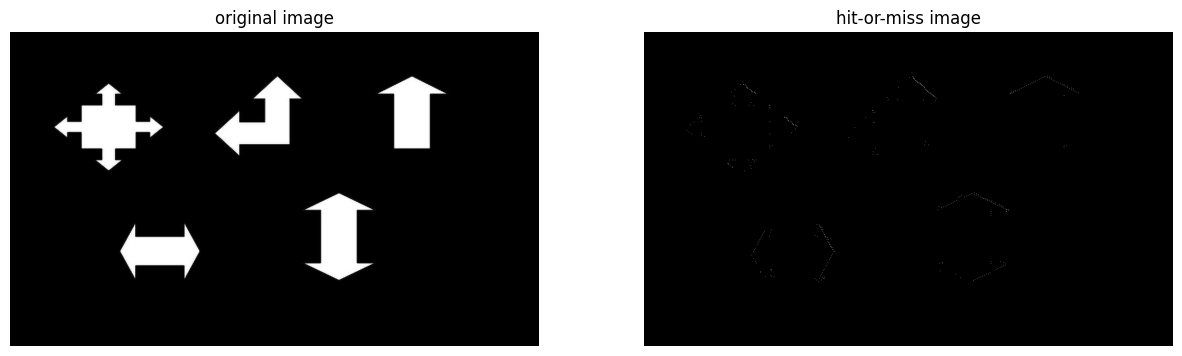

In [46]:
from PIL import Image
import numpy as np
import scipy.ndimage as snd
import cv2

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter09'
a = Image.open(os.path.join(base_path, 'images/thickening_input.png')).convert('L')
a = np.array(a)
# Defining the structuring element.
structure1 = np.array([[1, 1, 0],
                       [1, 1, 1],
                       [1, 1, 1]])
# Performing the binary hit-or-miss.
b = snd.morphology.binary_hit_or_miss(a, structure1=structure1)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('hit-or-miss image')
plt.imshow(b, cmap='gray')
plt.axis('off')

# Saving the image as 8-bit as b is a binary image of dtype=bool
cv2.imwrite('hitormiss_output2.png', b*255)